#### Answer_1

f(x) = sign(w^T x + b)

where:

* x is the input vector (a data point in the feature space)
* w is the weight vector that defines the hyperplane separating the classes
* b is the bias term or intercept
* sign() is the sign function, which returns +1 if its argument is positive and -1 if its argument is negative.

#### Answer_2

The objective function of a linear Support Vector Machine (SVM) is to find the weight vector w and bias term b that maximally separates the two classes while minimizing the classification error. This can be formulated as an optimization problem with a hinge loss function:

* >> minimize 1/2 ||w||^2 + C * sum_i max(0, 1 - y_i (w^T x_i + b))

where:

* ||w|| is the L2-norm of the weight vector
* C is a hyperparameter that controls the tradeoff between maximizing the margin and minimizing the classification error
* sum_i is the sum over all data points (i.e., training examples)
* y_i is the label (+1 or -1) of the i-th data point
* x_i is the feature vector of the i-th data point
* The first term in the objective function (1/2 ||w||^2) is a regularization term that penalizes large weight values and promotes a simple model. The second term is the hinge loss function, which measures the classification error and is zero for correctly classified data points and positive for misclassified data points.

The optimization problem seeks to minimize the sum of the regularization term and the hinge loss function subject to the constraint that all data points lie on the correct side of the hyperplane. This can be solved using various techniques, including gradient descent, quadratic programming, or the dual formulation.

#### Answer_3

The kernel trick is a technique used in Support Vector Machines (SVMs) to transform a linearly non-separable problem in the input space to a separable problem in a higher-dimensional feature space. The idea behind the kernel trick is to implicitly compute the inner product of the data points in the feature space without actually computing the transformation explicitly.

Instead of computing the inner product directly in the feature space, the kernel function is used to calculate the inner product in a computationally efficient manner. The kernel function takes two input data points and maps them to a higher-dimensional feature space where the inner product can be computed.

Some common kernel functions used in SVMs include:

* >> Linear kernel: k(x, y) = x^T y

* >> Polynomial kernel: k(x, y) = (x^T y + c)^d, where d is the degree of the polynomial and c is a constant

* >> Gaussian (or radial basis function) kernel: k(x, y) = exp(-gamma ||x - y||^2), where gamma is a hyperparameter that controls the width of the kernel

By using the kernel trick, SVMs can learn non-linear decision boundaries in the feature space without explicitly computing the transformation. This allows SVMs to efficiently solve complex classification problems that cannot be solved using linear classifiers.

#### Answer_4

The role of support vectors in Support Vector Machines (SVMs) is to define the decision boundary (hyperplane) that separates the two classes in the feature space. Support vectors are the data points that lie closest to the decision boundary and are used to determine the optimal hyperplane that maximizes the margin between the two classes.

In other words, support vectors are the critical data points that define the decision boundary and are necessary for the SVM to classify new data points accurately. The SVM algorithm attempts to find the hyperplane that maximizes the margin between the two classes while minimizing the classification error. The margin is defined as the distance between the decision boundary and the closest data points from each class.

#### Answer_5

### HARD MARGIN

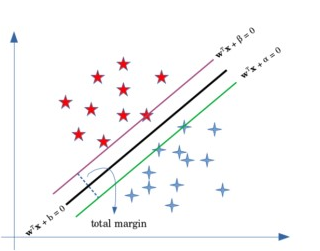

### SOFT MARGIN

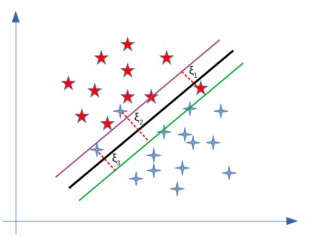

### HYPERPLANE

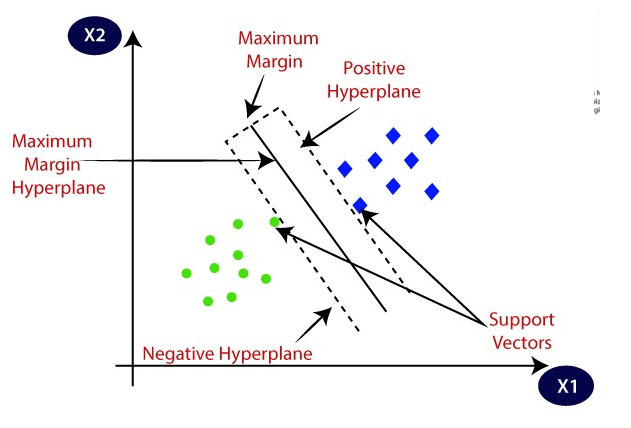

#### Answer_6

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import load_iris
data = load_iris()

In [7]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
df1 = pd.DataFrame(data.data,columns=data.feature_names)

In [14]:
df2 = pd.DataFrame(data.target,columns=['target'])

In [17]:
df = pd.concat([df1,df2],axis = 1)

In [19]:
## Target Names:

# setosa = 0
# versicolor= 1 
# virginica= 2

In [20]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [22]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
Y = df['target']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [26]:
from sklearn.svm import SVC
SVC_clff = SVC(kernel='linear')
SVC_clff.fit(X_train,Y_train)

SVC(kernel='linear')

In [27]:
Y_test_pred = SVC_clff.predict(X_test)

In [29]:
from sklearn.metrics import r2_score

score = r2_score(Y_test,Y_test_pred)
print(score)

0.9536585365853658


* 95.36% of accuracy

In [42]:
Parameters = {
              'C':[1,2,3,4,5],
              'gamma':['scale','auto'],
              'decision_function_shape' : ['ovo','ovr']
}

In [50]:
from sklearn.model_selection import GridSearchCV
clff = SVC(kernel='linear')
GRSV = GridSearchCV(clff,param_grid=Parameters,cv=10,verbose=3)

In [51]:
GRSV.fit(X_train,Y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV 1/10] END C=1, decision_function_shape=ovo, gamma=scale;, score=1.000 total time=   0.0s
[CV 2/10] END C=1, decision_function_shape=ovo, gamma=scale;, score=1.000 total time=   0.0s
[CV 3/10] END C=1, decision_function_shape=ovo, gamma=scale;, score=1.000 total time=   0.0s
[CV 4/10] END C=1, decision_function_shape=ovo, gamma=scale;, score=1.000 total time=   0.0s
[CV 5/10] END C=1, decision_function_shape=ovo, gamma=scale;, score=1.000 total time=   0.0s
[CV 6/10] END C=1, decision_function_shape=ovo, gamma=scale;, score=1.000 total time=   0.0s
[CV 7/10] END C=1, decision_function_shape=ovo, gamma=scale;, score=1.000 total time=   0.0s
[CV 8/10] END C=1, decision_function_shape=ovo, gamma=scale;, score=0.909 total time=   0.0s
[CV 9/10] END C=1, decision_function_shape=ovo, gamma=scale;, score=1.000 total time=   0.0s
[CV 10/10] END C=1, decision_function_shape=ovo, gamma=scale;, score=0.909 total time=   0.0s
[CV 1/

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 2, 3, 4, 5],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto']},
             verbose=3)

In [52]:
GRSV.best_params_

{'C': 1, 'decision_function_shape': 'ovo', 'gamma': 'scale'}

In [53]:
Y_test_pred_hpt = GRSV.predict(X_test)

In [55]:
from sklearn.metrics import r2_score
hpt_score = r2_score(Y_test,Y_test_pred_hpt)
hpt_score

0.9536585365853658